## Lista 3

### Zaimportowane biblioteki

In [1]:
import numpy as np
import scipy as sp
import time
import cProfile
import matplotlib.pyplot as plt

### Funkcje używane w zadaniach

In [15]:
def GaussSeidel(A,b,n):
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    D = np.zeros((len(A), len(A)), float)
    np.fill_diagonal(D, np.diag(A))
    x = np.zeros(len(A))
    T = -(np.linalg.inv(D+L))@U
    C = (np.linalg.inv(D+L))@b
    xs = []
    for i in range(n):
        x = T@x+C
        xs.append(x)
    return x, xs


In [3]:
def matrix_gen(n):
    A = np.zeros((n,n), float)
    d = 4*np.ones(n)
    ud = -1*np.ones(n-1)
    A = A + np.diag(d) + np.diag(ud, k=1) + np.diag(ud, k=-1)
    A[0][-1] = 1
    A[-1][0] = 1
    return A


### Zadanie 1

In [5]:
A = sp.linalg.hilbert(5)
b = np.array([5., 4., 3., 2., 1.])
x = np.zeros(5)
u = 0.00001
P, L, U = sp.linalg.lu(A)
x = np.linalg.inv(U)@(np.linalg.inv(L)@b)
r = b - A@x
while (np.linalg.norm(r) > np.linalg.norm(A@x)*u) and (np.linalg.norm(r) > np.linalg.norm(b)*u):
    delta_x = np.linalg.inv(A)@r
    x = x + delta_x
    r = b - A@x
x

array([   -95.00000002,   2160.00000045, -10710.00000198,  17920.000003  ,
        -9450.00000147])

### Zadanie 2

In [16]:
A = matrix_gen(20)
b = np.zeros(20)
b[-1] = 100
sol, xs = GaussSeidel(A, b, 2000)
sol

array([-7.73502692e+00, -2.07259421e+00, -5.55349941e-01, -1.48805549e-01,
       -3.98722562e-02, -1.06834753e-02, -2.86164518e-03, -7.63105381e-04,
       -1.90776345e-04, -6.77626358e-21,  1.90776345e-04,  7.63105381e-04,
        2.86164518e-03,  1.06834753e-02,  3.98722562e-02,  1.48805549e-01,
        5.55349941e-01,  2.07259421e+00,  7.73502692e+00,  2.88675135e+01])

### Zadanie 3

In [45]:
sol, xs = GaussSeidel(A, b, 50)
exact_sol = sp.linalg.solve(A,b)
exact_sol

array([-7.73502692e+00, -2.07259421e+00, -5.55349941e-01, -1.48805549e-01,
       -3.98722562e-02, -1.06834753e-02, -2.86164518e-03, -7.63105381e-04,
       -1.90776345e-04, -3.63138871e-20,  1.90776345e-04,  7.63105381e-04,
        2.86164518e-03,  1.06834753e-02,  3.98722562e-02,  1.48805549e-01,
        5.55349941e-01,  2.07259421e+00,  7.73502692e+00,  2.88675135e+01])

In [46]:
errors = np.abs(exact_sol-np.array(xs))
errors

array([[7.73502692e+00, 2.07259421e+00, 5.55349941e-01, 1.48805549e-01,
        3.98722562e-02, 1.06834753e-02, 2.86164518e-03, 7.63105381e-04,
        1.90776345e-04, 3.63138871e-20, 1.90776345e-04, 7.63105381e-04,
        2.86164518e-03, 1.06834753e-02, 3.98722562e-02, 1.48805549e-01,
        5.55349941e-01, 2.07259421e+00, 7.73502692e+00, 3.86751346e+00],
       [1.48502692e+00, 5.10094215e-01, 1.64724941e-01, 5.11492993e-02,
        1.54581937e-02, 4.57995971e-03, 1.33576627e-03, 3.81635654e-04,
        9.54089136e-05, 2.38418579e-05, 1.96736810e-04, 7.64595497e-04,
        2.86201771e-03, 1.06835685e-02, 3.98722794e-02, 1.48805555e-01,
        5.55349943e-01, 2.07259422e+00, 1.48502692e+00, 7.42513459e-01],
       [3.13151919e-01, 1.19469215e-01, 4.26546286e-02, 1.45282056e-02,
        4.77704132e-03, 1.52820190e-03, 4.77459388e-04, 1.43217075e-04,
        2.98438044e-05, 4.17232513e-05, 2.01579687e-04, 7.65899349e-04,
        2.86236695e-03, 1.06836616e-02, 3.98723042e-02, 1.4880

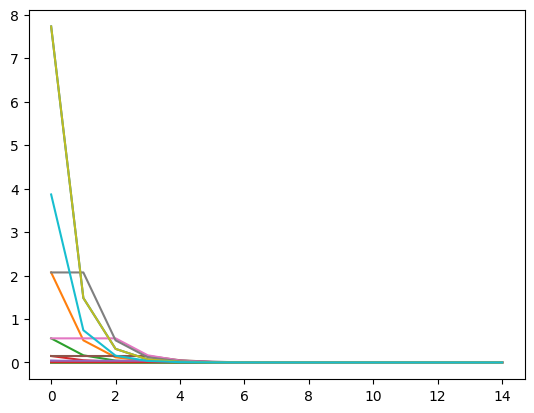

In [49]:
for j in range(20):
    ys = []
    for i in range(0,15,1):
        ys.append(errors[i][j])
    plt.plot(np.arange(0,15,1), ys)

In [8]:
start_gs = time.perf_counter_ns()
GaussSeidel(A,b, 2000)
end_gs = time.perf_counter_ns()

time_gs = end_gs-start_gs

start_sp= time.perf_counter_ns()
sp.linalg.solve(A,b)
end_sp = time.perf_counter_ns()

time_sp = end_sp - start_sp

print(time_gs*10**(-9))
print(time_sp*10**(-9))

0.012187300000000002
0.0009584000000000001


In [9]:
cProfile.run('GaussSeidel(A,b, 2000)')

         107 function calls (104 primitive calls) in 0.012 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.010    0.010    0.012    0.012 1834132545.py:1(GaussSeidel)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(diag)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(diagonal)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(fill_diagonal)
        2    0.000    0.000    0.002    0.001 <__array_function__ internals>:177(inv)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(tril)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(triu)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(where)
        1    0.000    0.000    0.012    0.012 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:1574(

In [10]:
cProfile.run('sp.linalg.solve(A,b)')

         50 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_1d)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_2d)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 _base.py:1301(isspmatrix)
        3    0.000    0.000    0.000    0.000 _basic.py:23(_solve_check)
        1    0.001    0.001    0.001    0.001 _basic.py:40(solve)
        2    0.000    0.000    0.000    0.000 _methods.py:61(_all)
        2    0.000    0.000    0.000    0.000 _misc.py:181(_datacopied)
        2    0.000    0.000    0.000    0.000 _util.py:206(_asarray_validated)
        3    0.000    0.000    0.000    0.000 blas.py:384(getter)
        2    0.000    0.000    0.000    0.000 core.py:6450(isMaskedArray)
        2    0.000    0.000    

### Zadanie 4

83

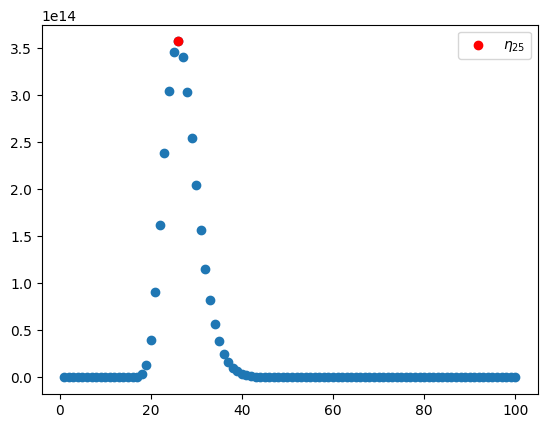

In [47]:
diag = np.arange(0.025,0.51,0.025)
ud = 5*np.ones(19)
A = np.zeros((20,20), float)
A = A + np.diag(diag) + np.diag(ud, k=1)
norms = np.zeros(100)
x = np.ones(20).T
norm_x = np.linalg.norm(x)
for i in range(0, 100, 1):
    x = A@x
    norms[i] = (np.linalg.norm(x)/norm_x)
plt.scatter(np.linspace(1,100,100), norms)
plt.scatter(26, norms[25], color='red', label = r'$\eta_{25}$')
plt.legend()

np.where(norms<norm_x)[0][0]


